In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

In [21]:
df=pd.read_csv("C:\\Users\\AKSHAY AKSHITA\\Downloads\\Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.rename(columns={"Id":1},inplace=True)   #inplace =true will help us to modify in the original dataset itself 
df

,1,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [24]:
df1=df.drop(1,axis=1)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
#Extracting Independent and dependent Variable  
x= data.iloc[:, [0,3]].values  
y= data.iloc[:, 4].values

In [26]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [27]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [28]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

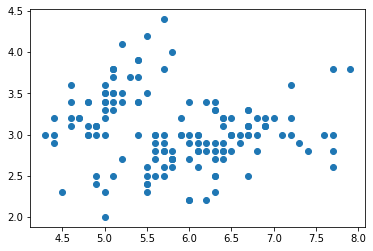

In [29]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

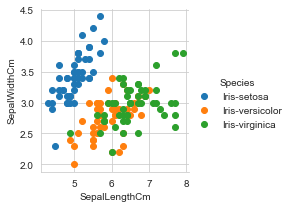

In [32]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
    .map(plt.scatter,'SepalLengthCm','SepalWidthCm') \
    .add_legend()

plt.show()

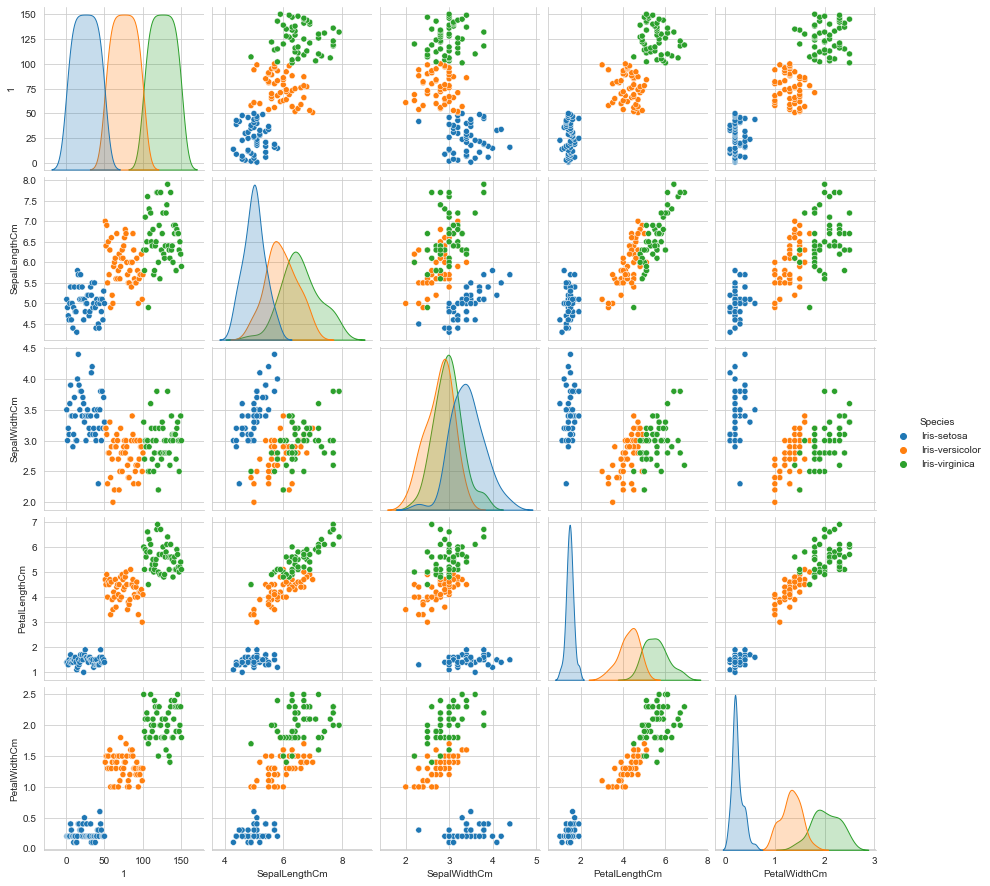

In [40]:
sns.pairplot(df,hue='Species')
plt.show()

In [48]:
# Fitting Decision Tree classifier to the training set 
# "criterion='entropy': Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
# random_state=0": For generating the random states.

from sklearn.tree import DecisionTreeClassifier  

x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

classifier= DecisionTreeClassifier(criterion='gini', min_samples_split=2)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier()

In [49]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [50]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

[Text(334.8, 489.24, 'X[2] <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(418.5, 380.52000000000004, 'X[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(167.4, 271.8, 'X[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(251.10000000000002, 163.08000000000004, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6, 271.8, 'X[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(585.9, 163.08000000000004, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(502.20000000000005, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(669.

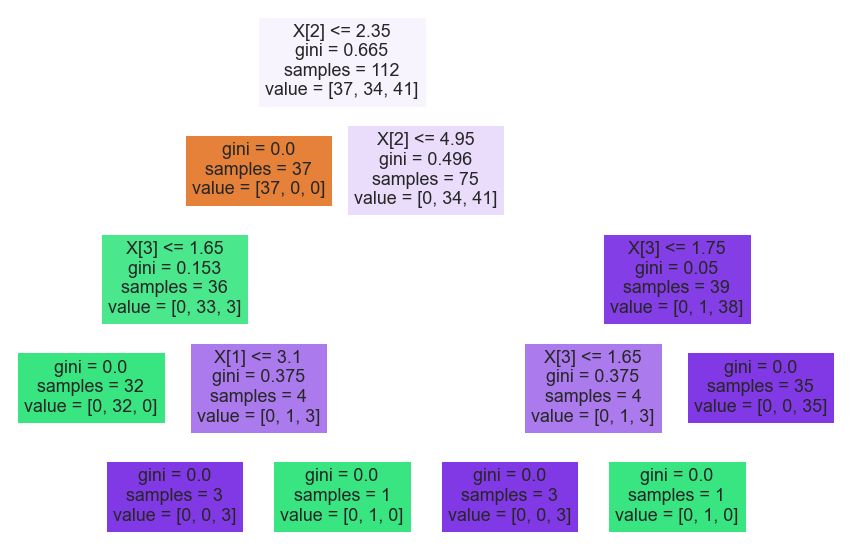

In [51]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier ,filled= True)

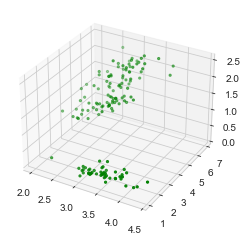

In [52]:
#Extracting Independent and dependent Variable  
x= data.iloc[:, [2,3]].values  
y= data.iloc[:, 4].values  
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x[:,0],x[:,1],y,color="g",label="plot",s=5)
plt.show()

In [53]:
print(tree.export_text(classifier))

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: Iris-virginica

